In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../data/kospi/price.csv", index_col='date', parse_dates=True)
sn = pd.read_csv("../../data/kospi/share_number.csv", index_col='date', parse_dates=True)
pm = pd.read_csv("../../data/kospi/price_mod.csv", index_col = 'date', parse_dates = True)

# quality
gp_t = pd.read_csv("../../data/kospi/gross_profit.csv", index_col='date', parse_dates=True)
ast_t = pd.read_csv("../../data/kospi/asset.csv", index_col='date', parse_dates=True)
lb_t = pd.read_csv("../../data/kospi/liability.csv", index_col = 'date', parse_dates = True)
cf_t = pd.read_csv("../../data/kospi/cashflow.csv", index_col = 'date', parse_dates = True)
sl_t = pd.read_csv("../../data/kospi/sales.csv", index_col = 'date', parse_dates = True)

# value
per_t = pd.read_csv("../../data/kospi/per.csv", index_col = 'date', parse_dates = True)
pbr_t = pd.read_csv("../../data/kospi/pbr.csv", index_col = 'date', parse_dates = True)
psr_t = pd.read_csv("../../data/kospi/psr.csv", index_col = 'date', parse_dates = True)
pcr_t = pd.read_csv("../../data/kospi/pcr.csv", index_col = 'date', parse_dates = True)

# dividend
div = pd.read_csv('../../data/kospi/dividend.csv', index_col='date', parse_dates=True)

In [3]:
# 삼성전자 제외
del df['A005930'], sn['A005930'], pm['A005930'], gp_t['A005930'], ast_t['A005930'], lb_t['A005930']
del cf_t['A005930'], sl_t['A005930'], per_t['A005930'], pbr_t['A005930'], psr_t['A005930'], pcr_t['A005930'], div['A005930']

In [4]:
m = 15

market_cap = df * sn
market_cap.index = market_cap.index + pd.tseries.offsets.MonthEnd(0)
m_cap = market_cap.groupby('date').last()

pm.index = pm.index + pd.tseries.offsets.MonthEnd(0)
m_pm = pm.groupby('date').last()
m_ret = (m_pm.fillna(-1) / m_pm.shift(1)).clip(0, 10) - 1

gp = pd.DataFrame(index=m_ret.index).join(gp_t).shift(m)
ast = pd.DataFrame(index=m_ret.index).join(ast_t).shift(m)
lb = pd.DataFrame(index=m_ret.index).join(lb_t).shift(m)
cf = pd.DataFrame(index=m_ret.index).join(cf_t).shift(m)
sl = pd.DataFrame(index=m_ret.index).join(sl_t).shift(m)

# 수정주가로 계산한 것으로 변경
df.index = df.index + pd.tseries.offsets.MonthEnd(0)
m_df = df.groupby('date').last()

per = (m_pm / (m_df/per_t)).shift(m)
pbr = (m_pm / (m_df/pbr_t)).shift(m)
psr = (m_pm / (m_df/psr_t)).shift(m)
pcr = (m_pm / (m_df/pcr_t)).shift(m)

# 최근 주가로 계산 (eps를 shift)
per_r = (m_pm / (m_df/per_t).shift(m))
pbr_r = (m_pm / (m_df/pbr_t).shift(m))
psr_r = (m_pm / (m_df/psr_t).shift(m))
pcr_r = (m_pm / (m_df/pcr_t).shift(m))

In [5]:
# quality
pivot = 12

# 수익성 팩터
gpoa = gp/ast # gross profit over asset
cfoa = cf/ast # cashflow profit over asset
gmar = gp/sl  # gross margin
turn = sl/ast

# 성장성 팩터(수익성 팩터, 5년 전과 비교해서 변화 정도 / 총자산)
gpoa_d = (gpoa - gpoa.shift(pivot))/ ast.shift(pivot)
cfoa_d = (cfoa - cfoa.shift(pivot))/ ast.shift(pivot)
gmar_d = (gmar - gmar.shift(pivot))/ sl.shift(pivot)
turn_d = sl/ast - sl.shift(12)/ast.shift(12)

# 안정성 팩터
lev = lb/ast # 총부채 / 총자산
gpvol = gpoa.rolling(pivot).std()  # gross profit volatility
cfvol = cfoa.rolling(pivot).std()  # cashflow volatility

gpoa_rank = gpoa.rank(axis=1, ascending=False)
cfoa_rank = cfoa.rank(axis=1, ascending=False)
gmar_rank = gmar.rank(axis=1, ascending=False)
turn_rank = turn.rank(axis=1, ascending=False)
gpoa_d_rank = gpoa_d.rank(axis=1, ascending=False)
cfoa_d_rank = cfoa_d.rank(axis=1, ascending=False)
gmar_d_rank = gmar_d.rank(axis=1, ascending=False)
turn_d_rank = turn_d.rank(axis=1, ascending=False)
lev_rank = lev.rank(axis=1)
gpvol_rank = gpvol.rank(axis=1)
cfvol_rank = cfvol.rank(axis=1)

gpoa_z = (gpoa_rank.T - gpoa_rank.mean(axis=1)) / gpoa_rank.std(axis=1)
cfoa_z = (cfoa_rank.T - cfoa_rank.mean(axis=1)) / cfoa_rank.std(axis=1)
gmar_z = (gmar_rank.T - gmar_rank.mean(axis=1)) / gmar_rank.std(axis=1)
turn_z = (turn_rank.T - turn_rank.mean(axis=1)) / turn_rank.std(axis=1)
gpoa_d_z = (gpoa_d_rank.T - gpoa_d_rank.mean(axis=1)) / gpoa_d_rank.std(axis=1)
cfoa_d_z = (cfoa_d_rank.T - cfoa_d_rank.mean(axis=1)) / cfoa_d_rank.std(axis=1)
gmar_d_z = (gmar_d_rank.T - gmar_d_rank.mean(axis=1)) / gmar_d_rank.std(axis=1)
turn_d_z = (turn_d_rank.T - turn_d_rank.mean(axis=1)) / turn_d_rank.std(axis=1)
lev_z = (lev_rank.T - lev_rank.mean(axis=1)) / lev_rank.std(axis=1)
gpvol_z = (gpvol_rank.T - gpvol_rank.mean(axis=1)) / gpvol_rank.std(axis=1)
cfvol_z = (cfvol_rank.T - cfvol_rank.mean(axis=1)) / cfvol_rank.std(axis=1)

total_qz = gpoa_z.T + cfoa_z.T + gmar_z.T + turn_z.T + gpoa_d_z.T + cfoa_d_z.T + gmar_d_z.T + turn_d_z.T + lev_z.T + gpvol_z.T + cfvol_z.T
total_qz = ((total_qz.T - total_qz.mean(axis=1)) / total_qz.std(axis=1)).T

In [6]:
# value
per_rank = per.rank(axis=1, pct=True)
pbr_rank = pbr.rank(axis=1, pct=True)
psr_rank = psr.rank(axis=1, pct=True)
pcr_rank = pcr.rank(axis=1, pct=True)

per_z = ((per_rank.T - per_rank.mean(axis=1)) / per_rank.std(axis=1))
pbr_z = ((pbr_rank.T - pbr_rank.mean(axis=1)) / pbr_rank.std(axis=1))
psr_z = ((psr_rank.T - psr_rank.mean(axis=1)) / psr_rank.std(axis=1))
pcr_z = ((pcr_rank.T - pcr_rank.mean(axis=1)) / pcr_rank.std(axis=1))

total_vz = per_z.T + pbr_z.T + psr_z.T + pcr_z.T

# value
per_rank_r = per_r.rank(axis=1, pct=True)
pbr_rank_r = pbr_r.rank(axis=1, pct=True)
psr_rank_r = psr_r.rank(axis=1, pct=True)
pcr_rank_r = pcr_r.rank(axis=1, pct=True)

per_zr = ((per_rank_r.T - per_rank_r.mean(axis=1)) / per_rank_r.std(axis=1))
pbr_zr = ((pbr_rank_r.T - pbr_rank_r.mean(axis=1)) / pbr_rank_r.std(axis=1))
psr_zr = ((psr_rank_r.T - psr_rank_r.mean(axis=1)) / psr_rank_r.std(axis=1))
pcr_zr = ((pcr_rank_r.T - pcr_rank_r.mean(axis=1)) / pcr_rank_r.std(axis=1))

total_vzr = per_zr.T + pbr_zr.T + psr_zr.T + pcr_zr.T

In [7]:
# momentum
momentum = (m_pm / m_pm.shift(2) - m_pm / m_pm.shift(1)) /2

# 대형주와 소형주 구분 (시총 기준 반반)
m_cap_rank = m_cap.rank(axis=1, pct=True, ascending=False)
big_mask = m_cap_rank <= 0.5
small_mask = m_cap_rank > 0.5

# quality factor에 대해 대형주, 소형주 mask
bq_mask = total_qz[big_mask].rank(axis=1, pct=True) < 0.5
sq_mask = total_qz[small_mask].rank(axis=1, pct=True) < 0.5

# 대형주 - momentum, 소형주 - value 
bm_mask = momentum[momentum[bq_mask] > 0].rank(axis=1, pct=True, ascending=False) < 0.3
bv_mask = total_vz[bq_mask].rank(axis=1, pct=True) < 0.3
sm_mask = momentum[momentum[sq_mask] > 0].rank(axis=1, pct=True, ascending=False) < 0.3
sv_mask = total_vz[sq_mask].rank(axis=1, pct=True) < 0.3

# 시가총액 가중평균
bm_cap_weight = (m_cap[bm_mask].T / m_cap[bm_mask].sum(axis=1)).T
bv_cap_weight = (m_cap[bv_mask].T / m_cap[bv_mask].sum(axis=1)).T
sm_cap_weight = (m_cap[sm_mask].T / m_cap[sm_mask].sum(axis=1)).T
sv_cap_weight = (m_cap[sv_mask].T / m_cap[sv_mask].sum(axis=1)).T

In [8]:
def MDD(arr):
    low = np.argmin(arr / np.maximum.accumulate(arr))
    high = np.argmax(arr[:low])
    return high, low, (arr[high] - arr[low]) / arr[high]

def hit_ratio(arr, r, recent_num_ratio=True):
    total = round(sum(arr > 0) / len(arr), 4)
    recent = round(sum(arr[-1*r:] > 0) / len(arr[-1*r:]), 4) if recent_num_ratio else sum(arr[-1*r:] > 0)
    return total, recent

In [9]:
m_cap.rank(axis=1, pct=True).iloc[-1]['A001440']

0.7686375321336761

In [10]:
total_qz.rank(axis=1, pct=True).iloc[-1]['A001440']

0.8476420798065296

In [21]:
(pbr_z.T + psr_z.T + pcr_z.T).rank(axis=1, pct=True)[-3:-1]['A001440']

date
2020-11-30    0.781538
2020-12-31    0.776923
Name: A001440, dtype: float64

In [20]:
print(momentum['A001440'].iloc[-3:])
print(momentum.rank(axis=1, pct=True)['A001440'][-3:])

date
2020-11-30    0.067751
2020-12-31    0.341647
2021-01-31   -0.044518
Name: A001440, dtype: float64
date
2020-11-30    0.935567
2020-12-31    0.983269
2021-01-31    0.075933
Name: A001440, dtype: float64


## 대형주와 소형주 (시총 50% 씩) momentum과 value factor 효과

momentum: high - 2007-10-31 00:00:00, low - 2009-02-28 00:00:00, mdd - 0.4673
value:    high - 2015-06-30 00:00:00, low - 2020-03-31 00:00:00, mdd - 0.4887


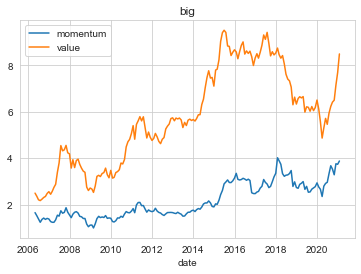

In [9]:
# 대형주 momentum, valeu 비교 (대형주는 quality 넉넉하게 잡는게 수익률 좋음)
bm_cr = ((m_ret * bm_cap_weight.shift(1)).sum(axis = 1) + 1).cumprod()[75:]
bv_cr = ((m_ret * bv_cap_weight.shift(1)).sum(axis = 1) + 1).cumprod()[75:]

h, l, mdd = MDD(bm_cr.values)
print(f'momentum: high - {bm_cr.index[h]}, low - {bm_cr.index[l]}, mdd - {round(mdd, 4)}')
h, l, mdd = MDD(bv_cr.values)
print(f'value:    high - {bv_cr.index[h]}, low - {bv_cr.index[l]}, mdd - {round(mdd, 4)}')

sns.set_style('whitegrid')
sns.lineplot(bm_cr.index, bm_cr, label='momentum')
sns.lineplot(bv_cr.index, bv_cr, label='value')
plt.title('big')
plt.show()

momentum: high - 2007-07-31 00:00:00, low - 2008-10-31 00:00:00, mdd - 0.5826
value:    high - 2007-07-31 00:00:00, low - 2008-10-31 00:00:00, mdd - 0.4841


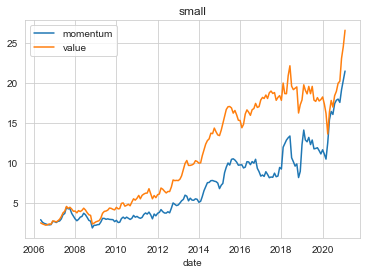

In [10]:
# 소형주 momentum, value 비교
sm_cr = ((m_ret * sm_cap_weight.shift(1)).sum(axis = 1) + 1).cumprod()[75:]
sv_cr = ((m_ret * sv_cap_weight.shift(1)).sum(axis = 1) + 1).cumprod()[75:]

h, l, mdd = MDD(sm_cr.values)
print(f'momentum: high - {sm_cr.index[h]}, low - {sm_cr.index[l]}, mdd - {round(mdd, 4)}')
h, l, mdd = MDD(sv_cr.values)
print(f'value:    high - {sv_cr.index[h]}, low - {sv_cr.index[l]}, mdd - {round(mdd, 4)}')

sns.set_style('whitegrid')
sns.lineplot(sm_cr.index, sm_cr, label='momentum')
sns.lineplot(sv_cr.index, sv_cr, label='value')
plt.title('small')
plt.show()

In [11]:
# 소형주 1월효과 존재하는지
print(sv_cr.index[9])
print(f'1월: {round(sv_cr[9::12].mean(), 4)}, 전체: {round(sv_cr.mean(), 4)}')

2007-01-31 00:00:00
1월: 11.571, 전체: 10.9342


big momentum: high - 2007-10-31 00:00:00, low - 2009-02-28 00:00:00, mdd - 0.4673
small value:  high - 2007-07-31 00:00:00, low - 2008-10-31 00:00:00, mdd - 0.4841


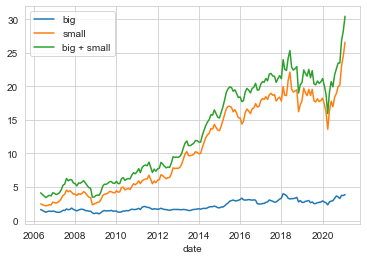

In [12]:
# 대형주 momentum, 소형주 value,  공통 quality
h, l, mdd = MDD(bm_cr.values)
print(f'big momentum: high - {bm_cr.index[h]}, low - {bm_cr.index[l]}, mdd - {round(mdd, 4)}')
h, l, mdd = MDD(sv_cr.values)
print(f'small value:  high - {sv_cr.index[h]}, low - {sv_cr.index[l]}, mdd - {round(mdd, 4)}')

sns.set_style('whitegrid')
sns.lineplot(bm_cr.index, bm_cr, label='big')
sns.lineplot(sv_cr.index, sv_cr, label='small')
sns.lineplot(bm_cr.index, bm_cr + sv_cr, label='big + small')
plt.show()

## 대형주와 소형주 (각각 상하위 100개 씩) 
## momentum과 value factor 효과

momentum: high - 2007-10-31 00:00:00, low - 2009-02-28 00:00:00, mdd - 0.5053
value:    high - 2007-10-31 00:00:00, low - 2009-02-28 00:00:00, mdd - 0.4979
momentum (hit): total - 0.5281, recent - 7
value (hit): total - 0.5506, recent - 9


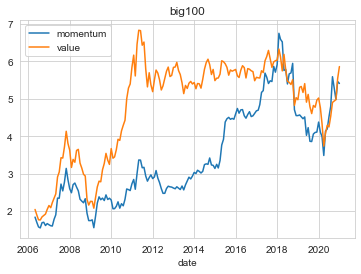

In [13]:
# 시총 상위 100개 기업에 대한 momentum과 value factor 누적 수익률 
b100_mask = m_cap.rank(axis=1, ascending=False) <= 100
bq100_mask = total_qz[b100_mask].rank(axis=1, pct=True) < 0.8
bm100_mask = momentum[momentum[bq100_mask] > 0].rank(axis=1, pct=True, ascending=False) < 0.3
bv100_mask = total_vz[bq100_mask].rank(axis=1, pct=True) < 0.3
bm100_cap_weight = (m_cap[bm100_mask].T / m_cap[bm100_mask].sum(axis=1)).T
bv100_cap_weight = (m_cap[bv100_mask].T / m_cap[bv100_mask].sum(axis=1)).T

bm100_r = (m_ret * bm100_cap_weight.shift(1)).sum(axis = 1)
bm100_cr = (bm100_r + 1).cumprod()[75:-1]
bv100_r = (m_ret * bv100_cap_weight.shift(1)).sum(axis = 1)
bv100_cr = (bv100_r + 1).cumprod()[75:-1]

# 동일비중
# bm100_cr = (m_ret[bm100_mask.shift(1)].mean(axis=1)+1).fillna(1).cumprod()[75:]
# bv100_cr = (m_ret[bv100_mask.shift(1)].mean(axis=1)+1).fillna(1).cumprod()[75:]

h, l, mdd = MDD(bm100_cr.values)
print(f'momentum: high - {bm100_cr.index[h]}, low - {bm100_cr.index[l]}, mdd - {round(mdd, 4)}')
h, l, mdd = MDD(bv100_cr.values)
print(f'value:    high - {bv100_cr.index[h]}, low - {bv100_cr.index[l]}, mdd - {round(mdd, 4)}')

t, r = hit_ratio(bm100_r.values[75:], 12, False)
print(f'momentum (hit): total - {t}, recent - {r}')
t, r = hit_ratio(bv100_r.values[75:], 12, False)
print(f'value (hit): total - {t}, recent - {r}')

sns.set_style('whitegrid')
sns.lineplot(bm100_cr.index, bm100_cr, label='momentum')
sns.lineplot(bv100_cr.index, bv100_cr, label='value')
plt.title('big100')
plt.show()

momentum: high - 2008-02-29 00:00:00, low - 2008-09-30 00:00:00, mdd - 0.4718
value:    high - 2007-08-31 00:00:00, low - 2008-10-31 00:00:00, mdd - 0.4589
value (~2020.02): high - 2007-08-31 00:00:00, low - 2008-10-31 00:00:00, mdd - 0.4589
momentum (hit): total - 0.4607, recent - 7
value (hit): total - 0.5899, recent - 10


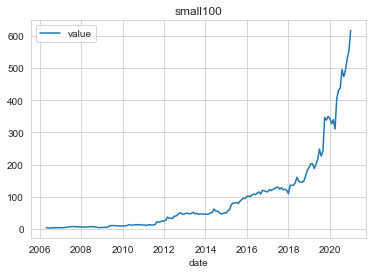

In [35]:
# 시총 하위 100개 기업에 대한 momentum과 value factor 누적 수익률 
# 동일 비중보다 시총가중의 수익률이 훨신 높음
s100_mask = m_cap.rank(axis=1, pct=True) <= 0.1
sq100_mask = total_qz[s100_mask].rank(axis=1, pct=True) < 0.2
sm100_mask = momentum[momentum[sq100_mask] > 0].rank(axis=1, pct=True, ascending=False) < 0.5
sv100_mask = total_vz[sq100_mask].rank(axis=1, pct=True) < 0.4
sm100_cap_weight = (m_cap[sm100_mask].T / m_cap[sm100_mask].sum(axis=1)).T
sv100_cap_weight = (m_cap[sv100_mask].T / m_cap[sv100_mask].sum(axis=1)).T

# sm100_r = (m_ret * sm100_cap_weight.shift(1)).sum(axis = 1)
# sv100_r = (m_ret * sv100_cap_weight.shift(1)).sum(axis = 1)

# # 동일비중
sm100_r = m_ret[sm100_mask.shift(1)].mean(axis=1).fillna(0)
sv100_r = m_ret[sv100_mask.shift(1)].mean(axis=1).fillna(0)

sm100_cr = (sm100_r + 1).cumprod()[75:-1]
sv100_cr = (sv100_r + 1).cumprod()[75:-1]

h, l, mdd = MDD(sm100_cr.values)
print(f'momentum: high - {sm100_cr.index[h]}, low - {sm100_cr.index[l]}, mdd - {round(mdd, 4)}')
h, l, mdd = MDD(sv100_cr.values)
print(f'value:    high - {sv100_cr.index[h]}, low - {sv100_cr.index[l]}, mdd - {round(mdd, 4)}')
h, l, mdd = MDD(sv100_cr[:-10].values)
print(f'value (~2020.02): high - {sv100_cr[:-10].index[h]}, low - {sv100_cr[:-10].index[l]}, mdd - {round(mdd, 4)}')

t, r = hit_ratio(sm100_r.values[75:], 12, False)
print(f'momentum (hit): total - {t}, recent - {r}')
t, r = hit_ratio(sv100_r.values[75:], 12, False)
print(f'value (hit): total - {t}, recent - {r}')

sns.set_style('whitegrid')
# 모멘텀 너무 괴랄하게 나와서 제외(특이 케이스같음..)
# sns.lineplot(sm100_cr.index, sm100_cr, label='momentum')
sns.lineplot(sv100_cr.index, sv100_cr, label='value')
plt.title('small100')
plt.show()

value:    high - 2007-08-31 00:00:00, low - 2008-10-31 00:00:00, mdd - 0.4524
value:    high - 2011-11-30 00:00:00, low - 2012-03-31 00:00:00, mdd - 0.2238
value (hit): total - 0.5955, recent - 10


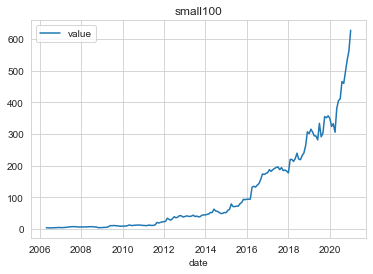

In [29]:
s100_mask = m_cap.rank(axis=1, pct=True) <= 0.1
sq100_mask = total_qz[s100_mask].rank(axis=1, pct=True) < 0.2

# 최근 주가로 계산한 value factor
sv100_mask_r = total_vzr[sq100_mask].rank(axis=1, pct=True) < 0.4
sv100_cap_weight_r = (m_cap[sv100_mask_r].T / m_cap[sv100_mask_r].sum(axis=1)).T

# sv100_r_r = (m_ret * sv100_cap_weight_r.shift(1)).sum(axis = 1)

# 동일비중
sv100_r_r = m_ret[sv100_mask_r.shift(1)].mean(axis=1).fillna(0)

sv100_cr_r = (sv100_r_r + 1).fillna(1).cumprod()[75:-1]             

h, l, mdd = MDD(sv100_cr_r.values)
print(f'value:    high - {sv100_cr_r.index[h]}, low - {sv100_cr_r.index[l]}, mdd - {round(mdd, 4)}')
h, l, mdd = MDD(sv100_cr_r[30:].values)
print(f'value:    high - {sv100_cr_r.index[h]}, low - {sv100_cr_r.index[l]}, mdd - {round(mdd, 4)}')
t, r = hit_ratio(sv100_r_r.values[75:], 12, False)
print(f'value (hit): total - {t}, recent - {r}')

sns.set_style('whitegrid')
#모멘텀 너무 괴랄하게 나와서 제외(특이 케이스같음..)
# sns.lineplot(sm100_cr.index, sm100_cr, label='momentum')
sns.lineplot(sv100_cr_r.index, sv100_cr_r, label='value')
# plt.yscale("log")
plt.title('small100')
plt.show()

In [16]:
# 소형주 1월효과 존재하는지
print(sv100_cr.index[9])
print(f'1월: {round(sv100_cr[9::12].mean(), 4)}, 전체: {round(sv100_cr.mean(), 4)}')

2007-01-31 00:00:00
1월: 48.4862, 전체: 52.9933


In [33]:
# 10% 이상 떨어지는 경우 손절하고 해당 월에는 다시 투자하지 않음 (익절라인 잡지않는 것이 이득)
m_ret_t = m_ret.copy()
out = 0.9
rein = 0.8
pm_group =  pm.groupby('date')
for i in range(75, len(sv100_mask_r.index)):
    portfolio = sv100_mask_r.iloc[i][sv100_mask_r.iloc[i]==True].index
    m_pm_info =pm_group.get_group(sv100_mask_r.index[i])[portfolio]
    stop_loss_mask = (m_pm_info < (m_pm_info.iloc[0] * out))
    stop_loss_idx = stop_loss_mask.sum()[stop_loss_mask.sum() > 0].index
    if len(stop_loss_idx) > 0:
        m_ret_t.iloc[i][stop_loss_idx] = (m_pm_info[stop_loss_mask].bfill() / m_pm_info.iloc[0] - 1).iloc[0].dropna()
        for j in stop_loss_idx:
            rein_mask = m_pm_info[stop_loss_mask][j].bfill().dropna()[1:] < (m_pm_info[j][0] * rein)
            if rein_mask.sum() > 0:
                rein_r = m_pm_info[j][-1] - m_pm_info[stop_loss_mask][j].bfill().dropna()[1:][rein_mask].ffill()[0]
                m_ret_t[j][i] = (m_ret_t[j][i] * m_pm_info[j].iloc[0] + rein_r) / m_pm_info[j].iloc[0]

value:    high - 2008-05-31 00:00:00, low - 2008-11-30 00:00:00, mdd - 0.4386
value (hit): total - 0.5506, recent - 8


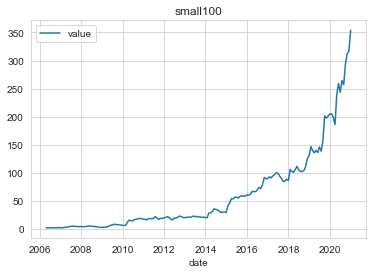

In [34]:
sv100_r10 = m_ret_t[sv100_mask.shift(1)].mean(axis=1).fillna(0)
sv100_cr10 = (sv100_r10 + 1).cumprod()[75:-1]

h, l, mdd = MDD(sv100_cr10.values)
print(f'value:    high - {sv100_cr10.index[h]}, low - {sv100_cr10.index[l]}, mdd - {round(mdd, 4)}')

t, r = hit_ratio(sv100_r10.values[75:], 12, False)
print(f'value (hit): total - {t}, recent - {r}')

sns.set_style('whitegrid')
sns.lineplot(sv100_cr10.index, sv100_cr10, label='value')
plt.title('small100')
plt.show()

In [65]:
m_ret_t = m_ret.copy()
cnt=0
for i in range(75, len(bm100_mask.index)):
    portfolio = bm100_mask.iloc[i][bm100_mask.iloc[i]==True].index
    m_pm_info = pm.groupby('date').get_group(bm100_mask.index[i])[portfolio]
    stop_loss = (m_pm_info < (m_pm_info.iloc[0] * 0.9)).sum()
    if len(stop_loss[stop_loss > 0].index) > 0:
        m_ret_t.iloc[i][stop_loss[stop_loss > 0].index] = -0.1

value:    high - 2018-01-31 00:00:00, low - 2020-03-31 00:00:00, mdd - 0.2694
value (hit): total - 0.548, recent - 7


/Users/daeyoung/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


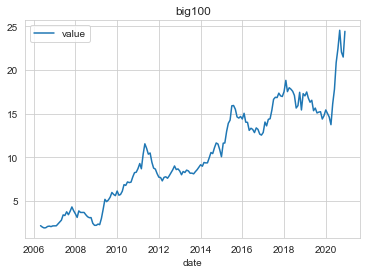

In [66]:
bm100_cap_weight10 = (m_cap[bm100_mask].T / m_cap[bm100_mask].sum(axis=1)).T
bm100_r10 = (m_ret_t * bm100_cap_weight10.shift(1)).sum(axis = 1)
bm100_cr10 = (bm100_r10 + 1).cumprod()[75:-1]

h, l, mdd = MDD(bm100_cr10.values)
print(f'value:    high - {bm100_cr10.index[h]}, low - {bm100_cr10.index[l]}, mdd - {round(mdd, 4)}')
t, r = hit_ratio(bm100_r10.values[75:], 12, False)
print(f'value (hit): total - {t}, recent - {r}')

sns.set_style('whitegrid')
sns.lineplot(bm100_cr10.index, bm100_cr10, label='value')
plt.title('big100')
plt.show()

## 대형주 momentum + 소형주 value (효과 극대화)<br>
### 대형주 - 시가총액 상위 200개 종목, quality 상위 60%, momentum 상위 10%
### 소형주 - 시가총액 하위 100개 종목, quality 상위 20%, value 상위 30%
##### (간단한 서치로 수익률, MDD 좋은 것으로 정함)
##### (합쳐서 10개 종목이 넘지 않게함)

In [146]:
bm_idx = bm100_mask.iloc[-1][bm100_mask.iloc[-1]==True].index
sv_idx = sv100_mask.iloc[-1][sv100_mask.iloc[-1]==True].index
sv_idx_r = sv100_mask_r.iloc[-1][sv100_mask_r.iloc[-1]==True].index
bs_idx = list(bm_idx) + list(sv_idx)
bs_idx_r = list(bm_idx) + list(sv_idx_r)

In [147]:
# 변동성 비교
bm_cov = pm[bm_idx].cov()
bm_weight = bm100_cap_weight.iloc[-1].dropna()
print(np.sqrt(np.dot(bm_weight.T.values, np.dot(bm_cov.values, bm_weight.values))))

sv_cov = pm[sv_idx].cov()
# 동일비중
sv_weight = np.ones(len(sv_idx)) / len(sv_idx)
# 시가총액가중
# sv_weight = sv100_cap_weight.iloc[-1].dropna()
print(np.sqrt(np.dot(sv_weight, np.dot(sv_cov.values, sv_weight))))

sv_cov_r = pm[sv_idx_r].cov()
sv_weight_r = np.ones(len(sv_idx_r)) / len(sv_idx_r)
print(np.sqrt(np.dot(sv_weight_r, np.dot(sv_cov_r.values, sv_weight_r))))

big = 0.5
bs_cov = pm[bs_idx].cov()
bs_weight = np.append(bm_weight * big, sv_weight * (1 - big))
print(np.sqrt(np.dot(bs_weight, np.dot(bs_cov.values, bs_weight))))

bs_cov_r = pm[bs_idx_r].cov()
bs_weight_r = np.append(bm_weight * big, sv_weight_r * (1 - big))
print(np.sqrt(np.dot(bs_weight_r, np.dot(bs_cov_r.values, bs_weight_r))))

54904.82530010411
28406.26013663858
6758.202593897718
24179.654238939853
29542.01081321882


0.5626695055520009


/Users/daeyoung/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


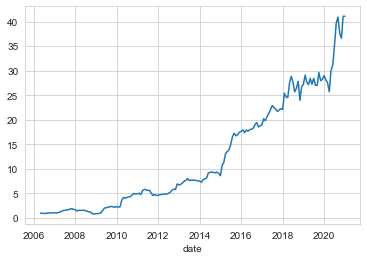

In [148]:
# 효과를 극대화한 대형주 momentum, 소형주 value 누적수익률
bm100_cap_weight_f0 = bm100_cap_weight.fillna(0)

# 동일비중
sv_t = sv100_mask.copy().astype(int)
sv_t['temp'] = sv100_mask.sum(axis=1)
sv_t = sv_t.replace(1, 0).replace(0, np.nan).bfill(axis=1)
del sv_t['temp']
sv100_cap_weight_f0 = (sv100_mask.astype(int) / sv_t)

bs_cap_weight = (bm100_cap_weight_f0 * big + sv100_cap_weight_f0 * (1- big))
bs_cr = ((m_ret * bs_cap_weight.shift(1)).sum(axis=1) + 1).cumprod()[75:]
print(MDD(bs_cr)[2])
sns.lineplot(bs_cr.index, bs_cr)
plt.show()

0.5455214617931257


/Users/daeyoung/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


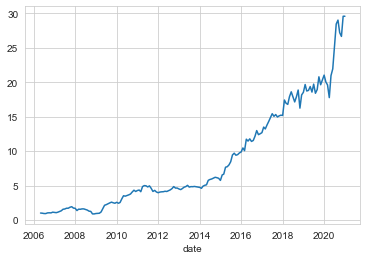

In [149]:
sv_tr = sv100_mask_r.copy().astype(int)
sv_tr['temp'] = sv100_mask_r.sum(axis=1)
sv_tr = sv_tr.replace(1, 0).replace(0, np.nan).bfill(axis=1)
del sv_tr['temp']
sv100_cap_weight_f0_r = (sv100_mask_r.astype(int) / sv_tr)

bs_cap_weight_r = (bm100_cap_weight_f0 * big + sv100_cap_weight_f0_r * (1- big))
bs_cr_r = ((m_ret * bs_cap_weight_r.shift(1)).sum(axis=1) + 1).cumprod()[75:]
print(MDD(bs_cr_r)[2])
sns.lineplot(bs_cr_r.index, bs_cr_r)
plt.show()

In [150]:
# 샤프비율 비교
bm_mr = (m_ret * bm100_cap_weight_f0.shift(1)).sum(axis=1)
sv_mr = (m_ret * sv100_cap_weight_f0.shift(1)).sum(axis=1)
sv_mr_r = (m_ret * sv100_cap_weight_f0_r.shift(1)).sum(axis=1)
bs_mr = (m_ret * bs_cap_weight.shift(1)).sum(axis=1)
bs_mr_r = (m_ret * bs_cap_weight_r.shift(1)).sum(axis=1)
print(bm_mr.mean() / bm_mr.std())
print(sv_mr.mean() / sv_mr.std())
print(sv_mr_r.mean() / sv_mr_r.std())
print(bs_mr.mean() / bs_mr.std())
print(bs_mr_r.mean() / bs_mr_r.std())

0.19805102479624212
0.20112985835912017
0.22442390909763474
0.23305535691266605
0.23953766899829368


In [124]:
pm[bs_idx].corr().loc[bm_idx][sv_idx]

,A000590,A006090,A089470,A090350,A163560
A051910,0.619579,0.378408,0.347737,0.260890,-0.052361
A207940,-0.557846,-0.439719,-0.489261,-0.185631,0.016440
A006400,0.417062,0.132249,0.101657,0.234506,-0.275358
A068270,0.384053,-0.127478,0.198428,0.540480,-0.199258
A035720,0.469612,0.237412,0.215104,0.344175,0.062186
A036570,0.523675,0.213530,0.178687,0.370973,-0.212494
A009830,0.632225,0.628090,0.403706,0.174147,0.287991
A034020,0.132092,0.569479,-0.541226,-0.673142,0.114320
A009240,0.689003,0.238254,0.763768,0.868684,0.805398
A006120,0.737716,0.732624,0.418557,0.334639,0.610344


In [125]:
seed = 20
bs_invest = bs_weight*seed
code_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0][['회사명', '종목코드']]
for i in range(len(bs_idx)):
    print(code_df.query(f'종목코드=={int(bs_idx[i][1:])}').values[0][0], bs_idx[i][1:], round(bs_invest[i], 4))

LG화학 051910 0.1778
삼성바이오로직스 207940 1.0417
삼성SDI 006400 0.83
셀트리온 068270 0.1852
카카오 035720 0.152
엔씨소프트 036570 0.2124
한화솔루션 009830 0.8309
두산중공업 034020 0.5329
한샘 009240 1.4032
SK디스커버리 006120 0.9896
제일약품 271980 1.3184
한국카본 017960 2.3258
CS홀딩스 000590 2.0
사조오양 006090 2.0
HDC현대EP 089470 2.0
노루페인트 090350 2.0
동일고무벨트 163560 2.0


In [126]:
seed = 20
bs_invest_r = bs_weight_r*seed
for i in range(len(bs_idx)):
    print(code_df.query(f'종목코드=={int(bs_idx_r[i][1:])}').values[0][0], bs_idx_r[i][1:], round(bs_invest_r[i], 4))

LG화학 051910 0.1778
삼성바이오로직스 207940 1.0417
삼성SDI 006400 0.83
셀트리온 068270 0.1852
카카오 035720 0.152
엔씨소프트 036570 0.2124
한화솔루션 009830 0.8309
두산중공업 034020 0.5329
한샘 009240 1.4032
SK디스커버리 006120 0.9896
제일약품 271980 1.3184
한국카본 017960 2.3258
CS홀딩스 000590 2.0
화승인더스트리 006060 2.0
사조오양 006090 2.0
동원수산 030720 2.0
비상교육 100220 2.0


In [32]:
sv_idx = list(sv100_mask_r.iloc[-1][sv100_mask_r.iloc[-1]==True].index)
code_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0][['회사명', '종목코드']]
for j in range(len(sv_idx)):
    print(code_df.query(f'종목코드=={int(sv_idx[j][1:])}').values[0][0], sv_idx[j][1:])

CS홀딩스 000590
에스제이엠홀딩스 025530
DSR제강 069730
동양고속 084670
에스제이엠 123700


## 시가총액이 낮은 기업이 상장폐지될 확률 높다고 생각<br>
#### 시총이 낮으면 상폐가 많이 됐지만 quality와 value로 필터링한 종목에는 없음!

In [35]:
# 전체 상폐된 기업과 폐지된 월
delist_total = (m_ret==-1)
delist_temp = delist_total[delist_total==True]
for i in range(0, len(m_pm)):
    zero_r = set(delist_temp.iloc[i].dropna().index)
    if zero_r:
        print(m_pm.index[i], zero_r)

2000-02-29 00:00:00 {'A004730'}
2000-03-31 00:00:00 {'A005790'}
2000-05-31 00:00:00 {'A000900', 'A010110'}
2000-06-30 00:00:00 {'A018550', 'A007100'}
2000-07-31 00:00:00 {'A001350', 'A000840', 'A005580', 'A002940'}
2000-09-30 00:00:00 {'A016390'}
2000-10-31 00:00:00 {'A011650', 'A005410'}
2001-01-31 00:00:00 {'A002080', 'A006160'}
2001-02-28 00:00:00 {'A008640', 'A014740'}
2001-03-31 00:00:00 {'A012710', 'A008990', 'A011260', 'A024960'}
2001-04-30 00:00:00 {'A009050', 'A011290'}
2001-05-31 00:00:00 {'A015620', 'A014080', 'A017320', 'A001400'}
2001-06-30 00:00:00 {'A000200', 'A003810', 'A002740'}
2001-07-31 00:00:00 {'A000280'}
2001-08-31 00:00:00 {'A030710', 'A015650', 'A017120'}
2001-10-31 00:00:00 {'A015880', 'A015580', 'A003320'}
2001-11-30 00:00:00 {'A007420'}
2001-12-31 00:00:00 {'A023130', 'A000310', 'A027460'}
2002-01-31 00:00:00 {'A002130', 'A011450', 'A008980'}
2002-02-28 00:00:00 {'A001690', 'A025840', 'A004290'}
2002-03-31 00:00:00 {'A008530'}
2002-04-30 00:00:00 {'A002180'}

In [ ]:
# sv100 중 상폐된 기업과 폐지된 월: 없음!
for i in range(0, len(sv100_mask)):
    zero_r = set(delist_temp.iloc[i].dropna().index)
    sv100_index = set(sv100_mask[sv100_mask==True].iloc[i].dropna().index)
    if sv100_index & zero_r:
        print(sv100_mask.index[i], sv100_index & zero_r)

In [ ]:
# bm100 중 상폐된 기업과 폐지된 월: 없음!
for i in range(0, len(bm100_mask)):
    zero_r = set(delist_temp.iloc[i].dropna().index)
    bm100_index = set(bm100_mask[sv100_mask==True].iloc[i].dropna().index)
    if bm100_index & zero_r:
        print(bm100_mask.index[i], bm100_index & zero_r)

In [ ]:
# 소형주의 수익률이 좋았어서 소형주 비율을 알아보기 위해 함수 정의
def cap_quantile_check(true_false_df, m_cap, axis=1, pct=1, ascending=True, mean=False):
    cap_quantile = m_cap.rank(axis=axis, pct=pct, ascending=ascending)[true_false_df] // 0.2
    p = pd.Series({0.0:0, 1.0:0, 2.0:0, 3.0:0, 4.0:0})
    for i in range(0, len(m_cap)):
        temp = cap_quantile.iloc[i].dropna().value_counts().sort_index().astype(int)
        p[temp.index] += temp
    if mean:
        p /= len(m_cap)
    print(f'p1: {p[0]}\np2: {p[1]}\np3: {p[2]}\np4: {p[3]}\np5: {p[4]}')
    print()

In [ ]:
# 시총기준으로 5개 분위수를 나눈 뒤 상장폐지된 기업 수 비교
# 상장폐지된 달의 시총은 nan이기 때문에 m_cap을 1 shift해서 전 달 시총 사용
cap_quantile_check(delist_total, m_cap.shift(1), ascending=False)

## 결과: 소형주 상장폐지가 많았다
## value와 quality로 필터링한 뒤에는 상장폐지된 종목이 없다.

## 다른 전략 : quality 상위 40% -> value 상위 20%

In [ ]:
# quality factor에서 수익률이 좋았던 1,2 분위를 대상(40%)으로 시총기준 분포 확인 (전체 달의 평균)
quality_40 = total_qz.rank(axis=1, pct=1) < 0.4
cap_quantile_check(quality_40, m_cap, ascending=False, mean=True)

# value factor로 필터링한 뒤 시총기준 분포확인
value_20 = total_vz[quality_40].rank(axis=1, pct=1) < 0.6
cap_quantile_check(value_20, m_cap, mean=True)

In [ ]:
# 누적수익률
(m_ret[value_20].mean(axis=1).fillna(0)+1).cumprod()

In [ ]:
value_40 = total_vz.rank(axis=1, pct=1) < 0.6
cap_quantile_check(value_40, m_cap, ascending=True, mean=True)

# value factor로 필터링한 뒤 시총기준 분포확인
quality_20 = total_qz[quality_40].rank(axis=1, pct=1) < 0.3
cap_quantile_check(quality_20, m_cap, ascending=False, mean=True)

In [ ]:
# 누적수익률
(m_ret[quality_20].mean(axis=1).fillna(0)+1).cumprod()

## 결과: 잘 안나옴!